In [173]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [174]:
dataset = pd.read_csv('UCI_Heart_Disease_Dataset_Combined.csv')
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0
1,49,0,2,160,180,0,0,156,0,1.0,1
2,37,1,1,130,283,0,1,98,0,0.0,0
3,48,0,3,138,214,0,0,108,1,1.5,1
4,54,1,2,150,195,0,0,122,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2938,59,1,1,140,221,0,1,164,1,0.0,1
2939,60,1,0,125,258,0,0,141,1,2.8,0
2940,47,1,0,110,275,0,0,118,1,1.0,0
2941,50,0,0,110,254,0,0,159,0,0.0,1


In [175]:
dataset = dataset.drop(['RestingECG', 'FastingBS', 'ExerciseAngina'], axis=1)
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,40,1,1,140,289,172,0.0,0
1,49,0,2,160,180,156,1.0,1
2,37,1,1,130,283,98,0.0,0
3,48,0,3,138,214,108,1.5,1
4,54,1,2,150,195,122,0.0,0
...,...,...,...,...,...,...,...,...
2938,59,1,1,140,221,164,0.0,1
2939,60,1,0,125,258,141,2.8,0
2940,47,1,0,110,275,118,1.0,0
2941,50,0,0,110,254,159,0.0,1


In [176]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
def plot_learning_curve(classifier, X, y, cv):
    # Assuming X_train and y_train are your training data and labels
    train_sizes, train_scores, valid_scores = learning_curve(
        classifier, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv
    )

    # Calculate mean and standard deviation of training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    # Print final scores
    print("Final Training Scores:", train_scores_mean[-1])
    print("Final Cross-validation Scores:", valid_scores_mean[-1])

    # Plot learning curve
    plt.figure()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.show()

In [178]:
import seaborn as sns
def plot_seaborn_cm(cm, title):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title(title, y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [179]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def print_metrics(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test,y_pred))
    print("Recall:", recall_score(y_test,y_pred))
    print("F1 Score:", f1_score(y_test,y_pred))
    return cm

In [180]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [181]:
temp_df = pd.DataFrame(X)
temp_df

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,40.0,1.0,140.0,289.0,172.0,0.0
1,0.0,0.0,1.0,0.0,49.0,0.0,160.0,180.0,156.0,1.0
2,0.0,1.0,0.0,0.0,37.0,1.0,130.0,283.0,98.0,0.0
3,0.0,0.0,0.0,1.0,48.0,0.0,138.0,214.0,108.0,1.5
4,0.0,0.0,1.0,0.0,54.0,1.0,150.0,195.0,122.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2938,0.0,1.0,0.0,0.0,59.0,1.0,140.0,221.0,164.0,0.0
2939,1.0,0.0,0.0,0.0,60.0,1.0,125.0,258.0,141.0,2.8
2940,1.0,0.0,0.0,0.0,47.0,1.0,110.0,275.0,118.0,1.0
2941,1.0,0.0,0.0,0.0,50.0,0.0,110.0,254.0,159.0,0.0


In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [183]:
# Scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [184]:
# with better parameters
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=21, min_samples_leaf=1, min_samples_split=2, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=21, random_state=42)

In [185]:
y_pred = classifier.predict(X_test)

In [186]:
cm = print_metrics(y_test=y_test, y_pred=y_pred)

[[200  63]
 [ 28 298]]
Accuracy: 0.8455008488964346
Precision: 0.8254847645429363
Recall: 0.9141104294478528
F1 Score: 0.8675400291120815


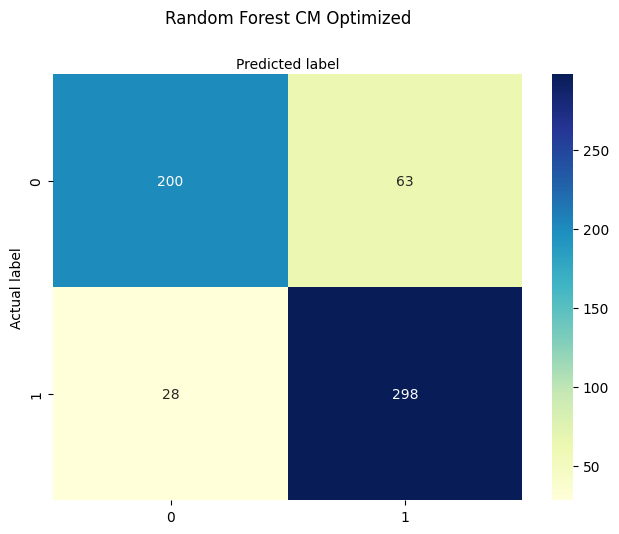

In [187]:
plot_seaborn_cm(cm, "Random Forest CM Optimized")

Final Training Scores: 0.9562446898895498
Final Cross-validation Scores: 0.7380501946109513


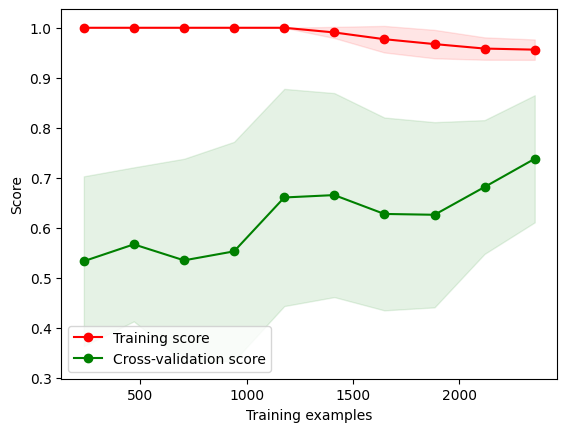

In [188]:
plot_learning_curve(classifier=classifier, X=X, y=y, cv=5)

Final Training Scores: 0.9541163141993959
Final Cross-validation Scores: 0.8051700680272109


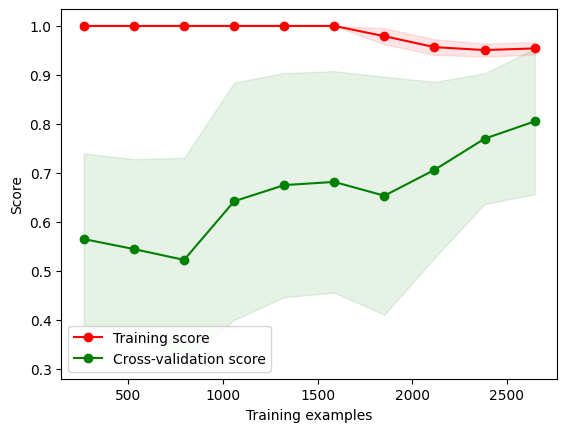

In [189]:
plot_learning_curve(classifier=classifier, X=X, y=y, cv=10)

In [190]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [191]:
y_pred = classifier.predict(X_test)

In [192]:
cm = print_metrics(y_test=y_test, y_pred=y_pred)

[[196  67]
 [ 37 289]]
Accuracy: 0.8234295415959253
Precision: 0.8117977528089888
Recall: 0.8865030674846626
F1 Score: 0.8475073313782991


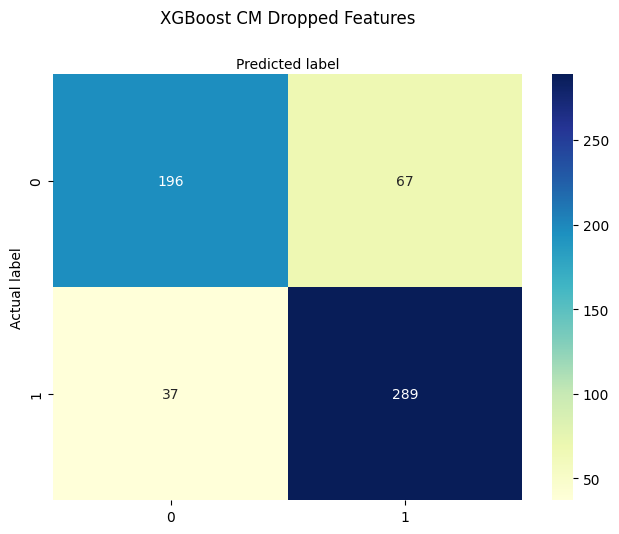

In [193]:
plot_seaborn_cm(cm, "XGBoost CM Dropped Features")

Final Training Scores: 0.9466389728096678
Final Cross-validation Scores: 0.7909120258272802


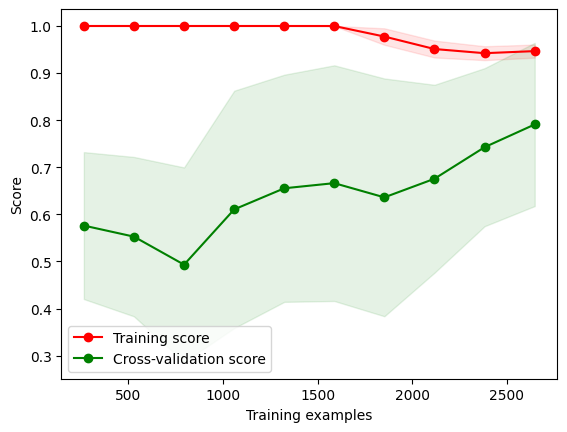

In [194]:
plot_learning_curve(classifier=classifier, X=X, y=y, cv=10)